# Titanic: Machine Learning from Disaster
### Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Modelling
- Testing

## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [318]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## 2. Collecting the Data

#### Import Libraries

In [319]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#### Import data

In [320]:
df = pd.read_csv("train.csv")

## 3. Exploratory data analysis

#### Head

In [321]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


At first, we take a look at the data 

#### Missing value

In [322]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Deleting Column cabin and PassengerId

In [323]:
del df["Cabin"],df["PassengerId"]

We delete these two columns for the simple reason that:  
Cabin has a lot of missing value  
PassengerId is useless

#### Filling the missing value in Age column

In [324]:
df["Age"].fillna(df["Age"].mode()[0], inplace=True)

Filling the missing value of Age with the mode

#### Delete the missing value in Embarked column

In [325]:
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### Convert the Survived column to yes/no 

In [326]:
df["Survived"] = np.where(df["Survived"]==1, 'yes', 'no')

Convert the value of Survived Column to yes/no for a better visualization

#### Summary

In [327]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,28.518751,0.524184,0.382452,32.096681
std,0.834700,13.162820,1.103705,0.806761,49.697504
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Some descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution

#### -Survived

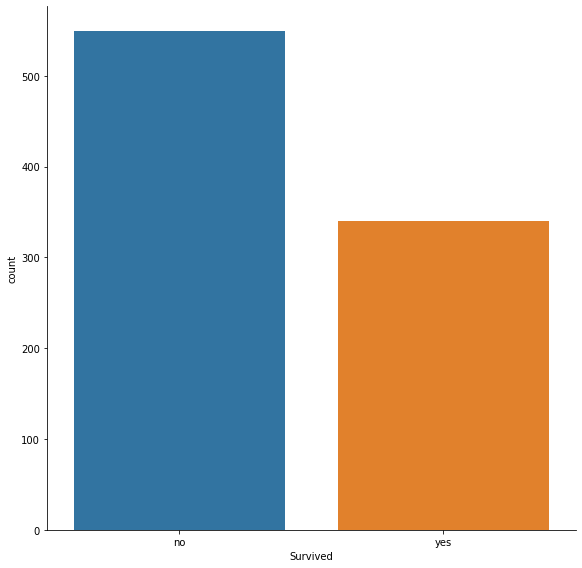

In [328]:
sns.catplot(x="Survived", kind="count", data=df,height=8, aspect=1)

From that catplot we can easily notice that the majority of the people didn't survive 

#### -Pclass 

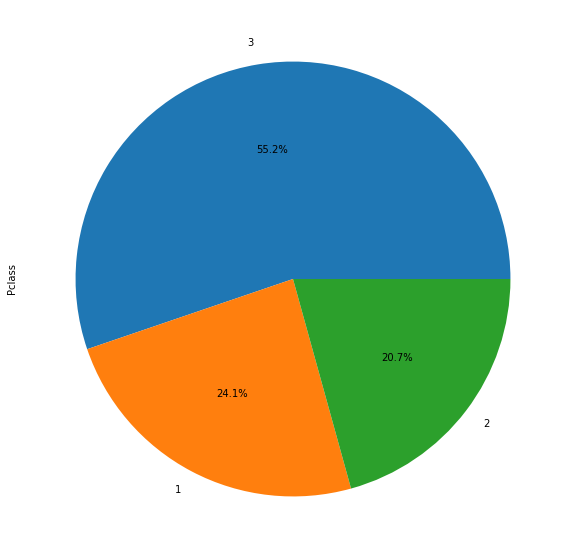

In [329]:
df["Pclass"].value_counts().plot(kind = "pie", autopct='%1.1f%%',figsize=(16, 10))

From this one, we can see that most people belong to class 3

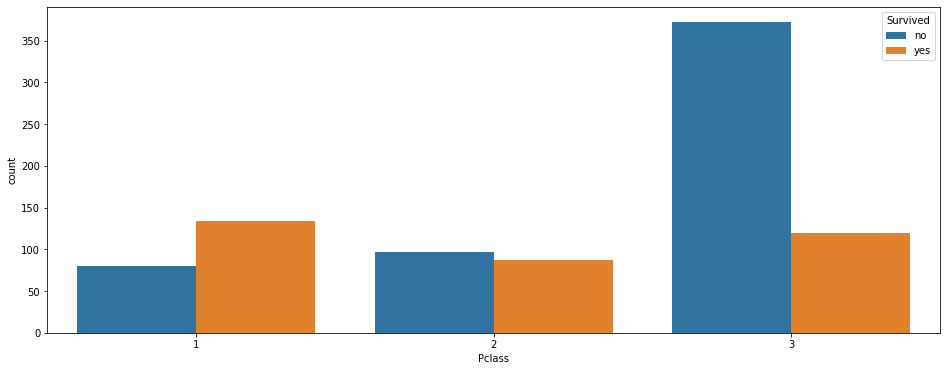

In [330]:
plt.figure(figsize=(16, 6))
sns.countplot(x = "Pclass",hue="Survived",data = df)

there we have a more spécific graph, indeed this one tells us that most of the people    
who survived belong to class 1 and 2

#### Creating a new column called 'Related' for a better analysing 

In [331]:
df["Related"] = df["SibSp"]+df["Parch"]

#### -Related

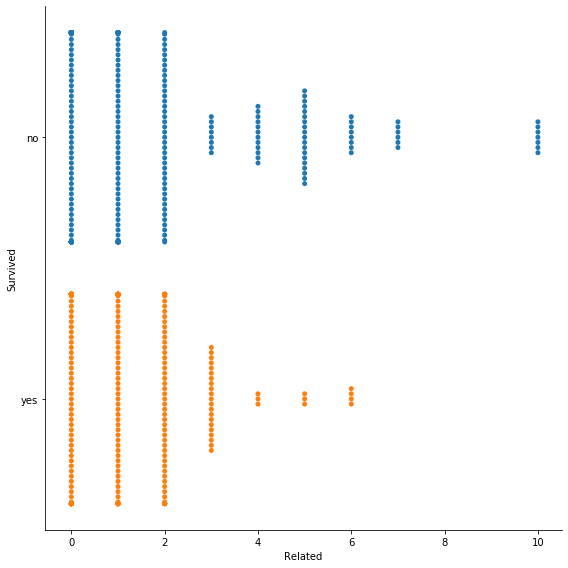

In [332]:
sns.catplot(y="Survived", x="Related", kind="swarm", data=df,height=8, aspect=1)

Text(0, 0.5, 'Related')

<Figure size 1152x432 with 0 Axes>

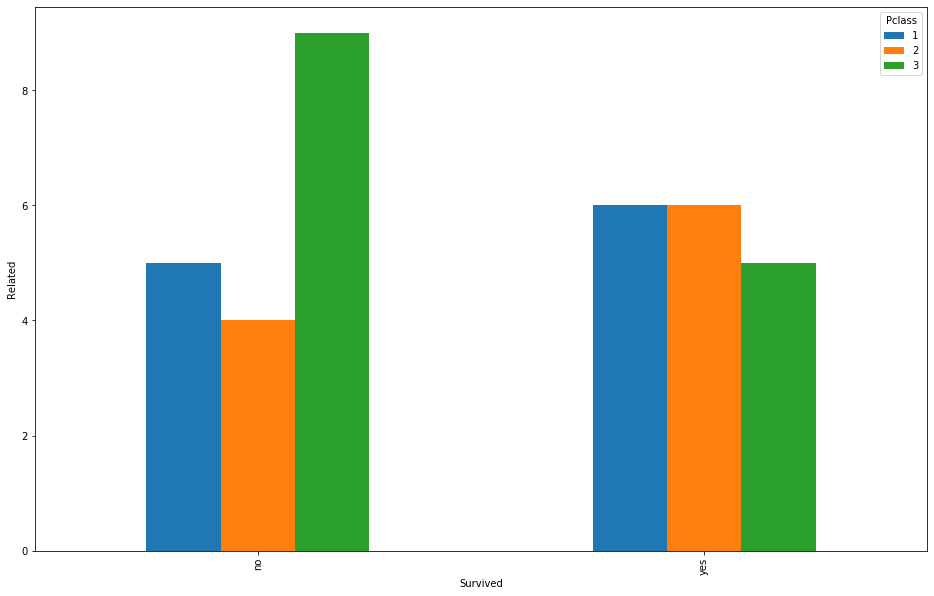

In [333]:
plt.figure(figsize=(16, 6))
df.pivot_table(values='Related',index=["Survived"],columns=["Pclass"],aggfunc =lambda x: len(x.unique())).plot(kind="bar",figsize=(16, 10)) 
plt.ylabel("Related")

from these graph, we can see that the more a passenger has family members on board  
the less chance he has of surviving, we can suppose that this is because most people  
worry about the fate of their loved one rather than themselves in the operation of evacuation.

#### -Sex

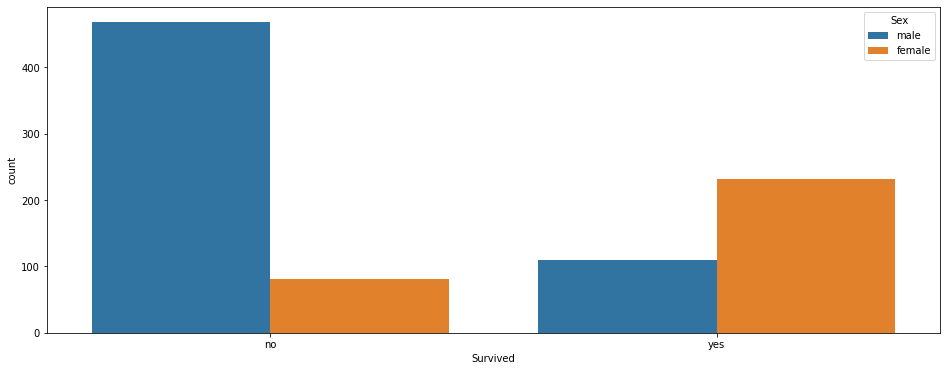

In [334]:
plt.figure(figsize=(16, 6))
sns.countplot(x = "Survived",hue="Sex",data = df)

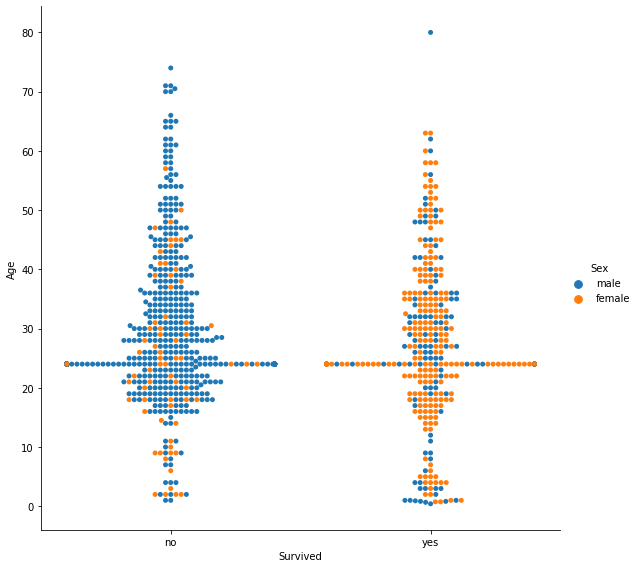

In [335]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="swarm", data=df,height=8, aspect=1)

<Figure size 1152x432 with 0 Axes>

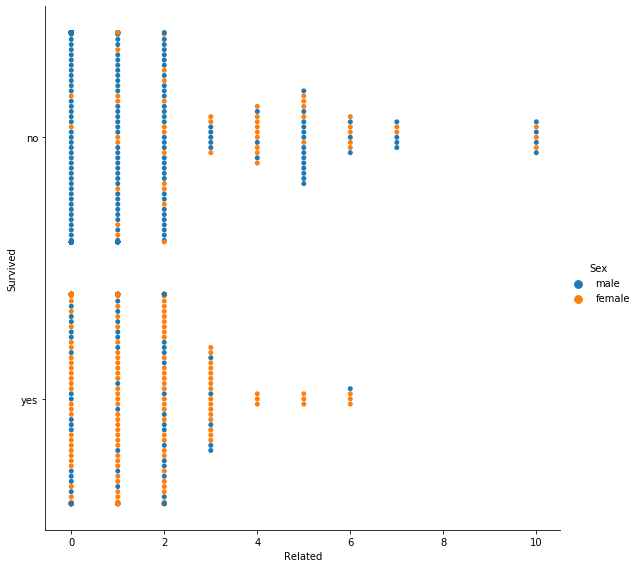

In [336]:
plt.figure(figsize=(16, 6))
sns.catplot(x="Related", y="Survived", hue="Sex", kind="swarm", data=df,height=8, aspect=1)

From these representation, we cannot deny the fact that those who have survived the most are women  
So the sex is an important factor to determine if a person will survive or not.

#### -Embarked & Age

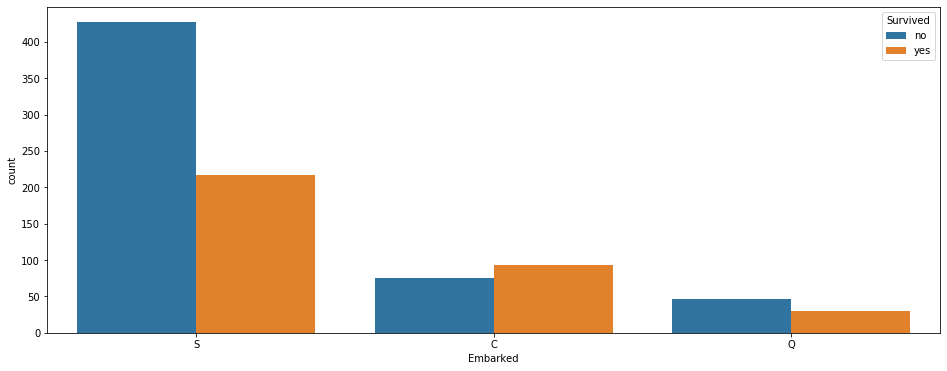

In [337]:
plt.figure(figsize=(16, 6))
sns.countplot(x = "Embarked",hue="Survived",data = df)

<Figure size 1440x720 with 0 Axes>

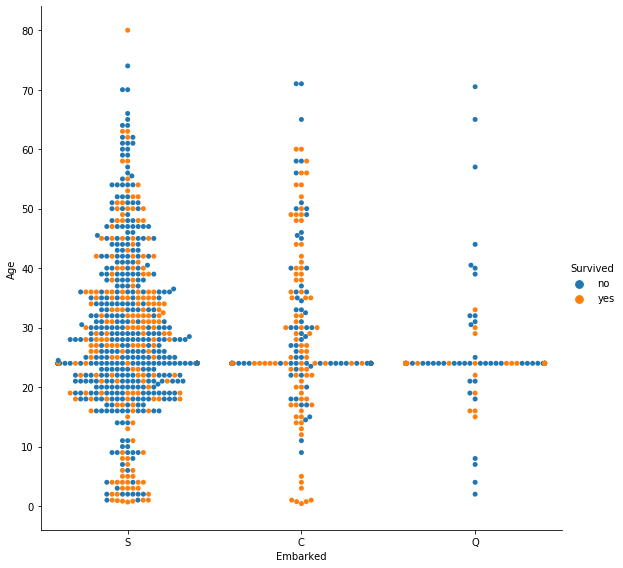

In [338]:
plt.figure(figsize=(20,10))
sns.catplot(x="Embarked", y="Age", hue="Survived", kind="swarm", data=df,height=8, aspect=1)

<Figure size 1440x720 with 0 Axes>

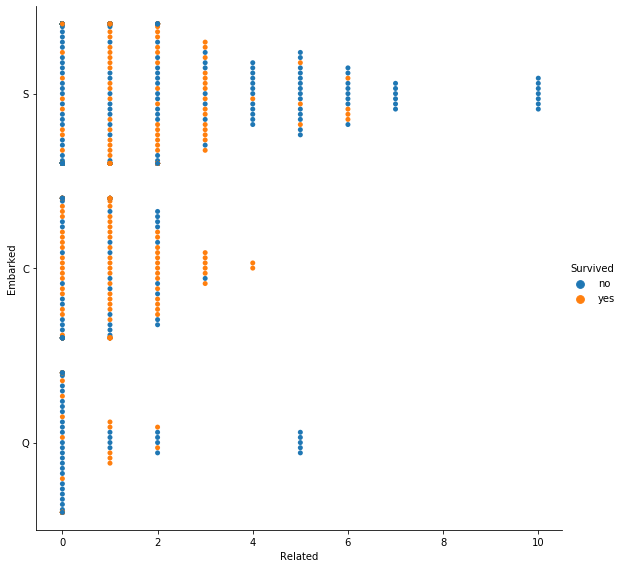

In [339]:
plt.figure(figsize=(20,10))
sns.catplot(y="Embarked", x="Related", hue="Survived", kind="swarm", data=df,height=8, aspect=1)

<Figure size 1152x432 with 0 Axes>

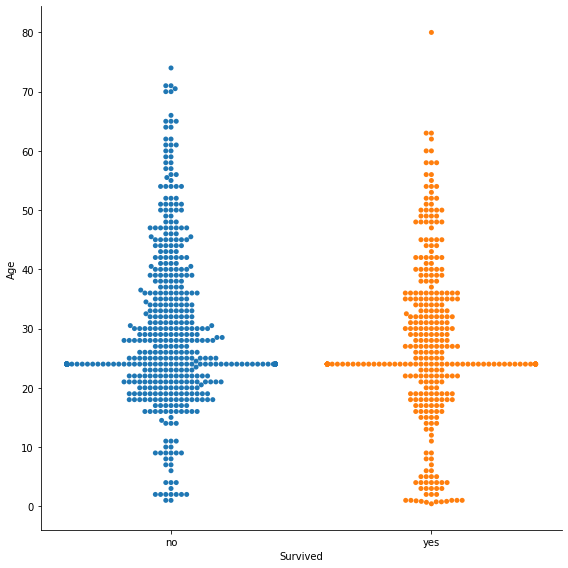

In [340]:
plt.figure(figsize=(16, 6))
sns.catplot(x="Survived", y="Age", kind="swarm", data=df,height=8, aspect=1)

We can notice four main points:  
- Most of the people on board have embarked from the port Southampton.
- Almost all the people who survived embarked from the port of Cherbourg.  
- Most of the passengers who are on board with their families have embarked from port Southampton.
- Most passengers who did not survive are between 18 and 40 years old.

## 4. Modeling

The most independant variables that we take as a factor of surviving is :  
- Embarked
- Sex 
- Age

#### Random Forest

In [341]:
df["Embarked"] = df["Embarked"].replace({"S":0,"C":1,"Q":2},regex=True)
df["Sex"] = df["Sex"].replace({"female":0,"male":1})
df["Survived"] = df["Survived"].replace({"no":0,"yes":1})
feature_cols = ["Embarked","Sex","Age"]
X = df[feature_cols]
Y = df["Survived"]
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,train_size=0.80,random_state=1)

So we prepare and split the data before creating the model

In [342]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

After creating our first model, we visualize the importance of each features

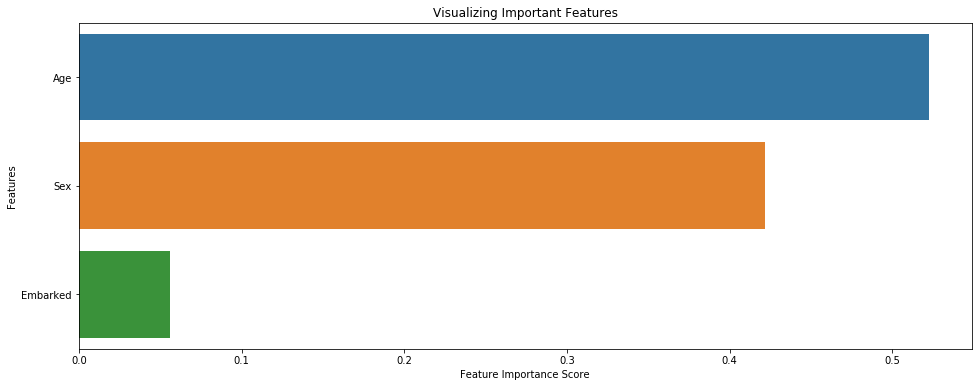

In [343]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(16, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### Logistic Regression

###### we will put our variables on the same scale

In [344]:
X = df.iloc[:,[3,4,9]].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [345]:
logistic_model = LogisticRegression(random_state = 0,solver='liblinear')
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Prediction

In [346]:
y_pred_Rdf = clf.predict(Xtest)
y_pred_lgr = logistic_model.predict(X_test)

Now, we make some prediction with the two model

#### Confusion Matrix

In [347]:
cm_Rdf = confusion_matrix(Ytest, y_pred_Rdf)
cm_lgr = confusion_matrix(y_test, y_pred_lgr)

#### Visualization of the Confusion Matrix

##### Random forest

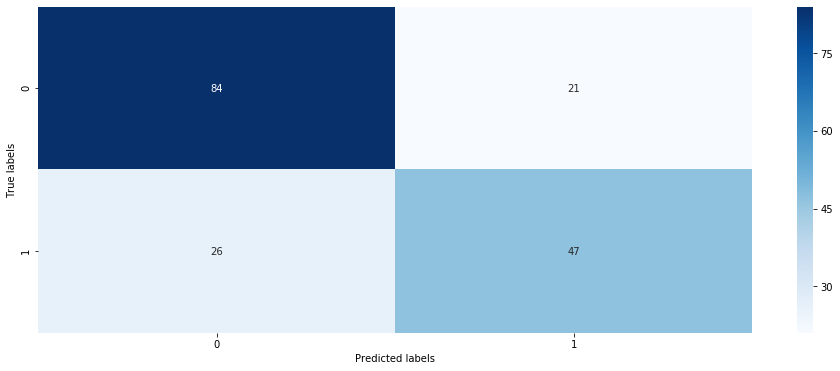

In [348]:
plt.figure(figsize=(16, 6))
ax= plt.subplot()
sns.heatmap(cm_Rdf, annot=True, ax = ax,cmap="Blues")
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

##### Logistic Regression

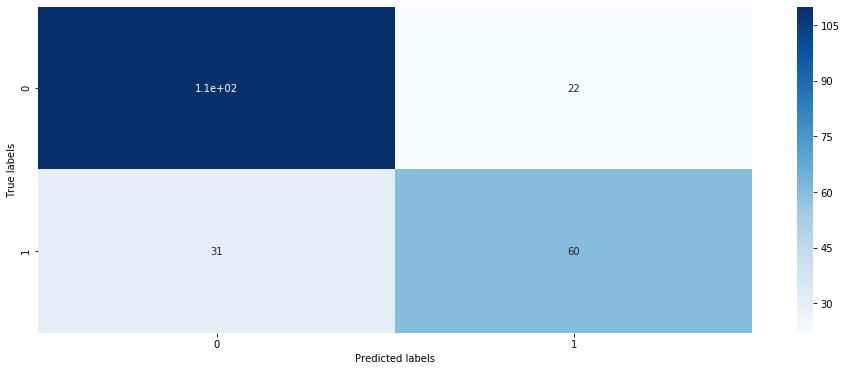

In [349]:
plt.figure(figsize=(16, 6))
ax= plt.subplot()
sns.heatmap(cm_lgr, annot=True, ax = ax,cmap="Blues")
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

#### The Accuracy of the two model

In [350]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [351]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(accuracy_score(Ytest, y_pred_Rdf)))

Accuracy of Random Forest classifier on test set: 0.74


## 5. Testing

#### Import the testing data

In [352]:
df_test = pd.read_csv("test.csv")

#### Preparing the data

In [353]:
df_test["Embarked"] = df_test["Embarked"].replace({"S":0,"C":1,"Q":2},regex=True)
df_test["Sex"] = df_test["Sex"].replace({"female":0,"male":1})

#### Deleting the Nan value 

In [354]:
del df_test["Cabin"],df_test["PassengerId"]
df_test.dropna(inplace=True)
df_test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### Prediction in the test_data

In [355]:
sc_transfo=sc.transform(df_test.iloc[:,[2,3,8]].values)
Survived_pred_LgR = logistic_model.predict(sc_transfo)
Survived_pred_Rdf = clf.predict(df_test[feature_cols])

#### Add a new columns containing the results of the two predictions 

In [356]:
df_test["Survived_Rdf"] = Survived_pred_Rdf
df_test["Survived_lgr"] = Survived_pred_LgR

#### Add a third columns containing the probabilities of the logit model

In [357]:
df_test["Survived_lgr_proba"] = logistic_model.predict_proba(sc_transfo)[:,1]

#### Checking if there is a difference between the two model 

In [358]:
len(df_test.loc[df_test["Survived_Rdf"]!=df_test["Survived_lgr"]])

60

#### Adjusting the name of the subcategories for better visualisation of the result 

In [359]:
df_test["Embarked"] = df_test["Embarked"].replace({0:"S",1:"C",2:"Q"})
df_test["Sex"] = df_test["Sex"].replace({0:"female",1:"male"})
df_test["Survived_Rdf"] = np.where(df_test["Survived_Rdf"]==1, 'yes', 'no')
df_test["Survived_lgr"] = np.where(df_test["Survived_lgr"]==1, 'yes', 'no')
df_test["Related"] = df_test["SibSp"]+df_test["Parch"]
del df_test["SibSp"],df_test["Pclass"],df["Ticket"],df["Fare"],df["Parch"]
df_test.head(20)

,Name,Sex,Age,Parch,Ticket,Fare,Embarked,Survived_Rdf,Survived_lgr,Survived_lgr_proba,Related
0,"Kelly, Mr. James",male,34.5,0,330911,7.8292,Q,no,no,0.290395,0
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,0,363272,7.0000,S,no,yes,0.672592,1
2,"Myles, Mr. Thomas Francis",male,62.0,0,240276,9.6875,Q,no,no,0.242551,0
3,"Wirz, Mr. Albert",male,27.0,0,315154,8.6625,S,no,no,0.161699,0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,3101298,12.2875,S,yes,yes,0.719687,2
5,"Svensson, Mr. Johan Cervin",male,14.0,0,7538,9.2250,S,no,no,0.178039,0
6,"Connolly, Miss. Kate",female,30.0,0,330972,7.6292,Q,yes,yes,0.844305,0
7,"Caldwell, Mr. Albert Francis",male,26.0,1,248738,29.0000,S,no,no,0.162912,2
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,2657,7.2292,C,yes,yes,0.800291,0
9,"Davies, Mr. John Samuel",male,21.0,0,A/4 48871,24.1500,S,no,no,0.169085,2


#### Visualization of the results

##### Head of the differences between the predictions of the two models

In [360]:
df_test.loc[df_test["Survived_Rdf"]!=df_test["Survived_lgr"]]

,Name,Sex,Age,Parch,Ticket,Fare,Embarked,Survived_Rdf,Survived_lgr,Survived_lgr_proba,Related
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,0,363272,7.0000,S,no,yes,0.672592,1
14,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.00,0,W.E.P. 5734,61.1750,S,no,yes,0.672592,1
17,"Assaf, Mr. Gerios",male,21.00,0,2692,7.2250,C,yes,no,0.234586,0
19,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.00,0,2696,7.2250,C,no,yes,0.759017,0
21,"Olsen, Master. Artur Karl",male,9.00,1,C 17368,3.1708,S,yes,no,0.184659,1
23,"Williams, Mr. Richard Norris II",male,21.00,1,PC 17597,61.3792,C,yes,no,0.234586,1
27,"Daher, Mr. Shedid",male,22.50,0,2698,7.2250,C,yes,no,0.232193,0
37,"Cacic, Miss. Manda",female,21.00,0,315087,8.6625,S,no,yes,0.721482,0
46,"Chevre, Mr. Paul Romaine",male,45.00,0,PC 17594,29.7000,C,yes,no,0.198348,0
52,"Hocking, Miss. Ellen Nellie""""",female,20.00,1,29105,23.0000,S,no,yes,0.723271,3


###### Embarked and Age 

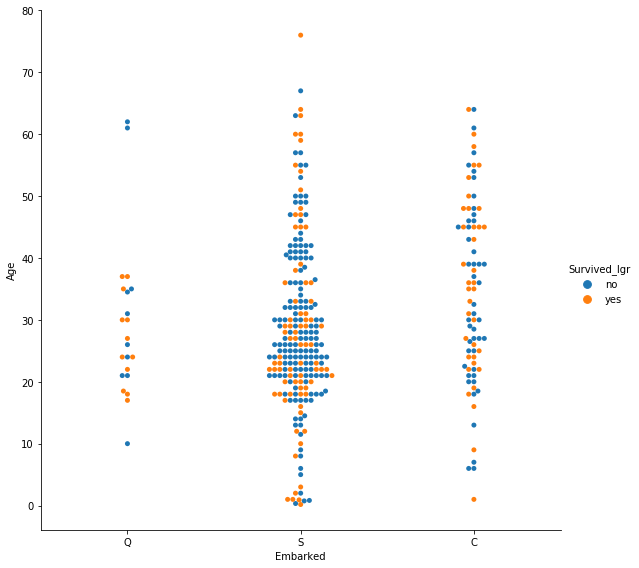

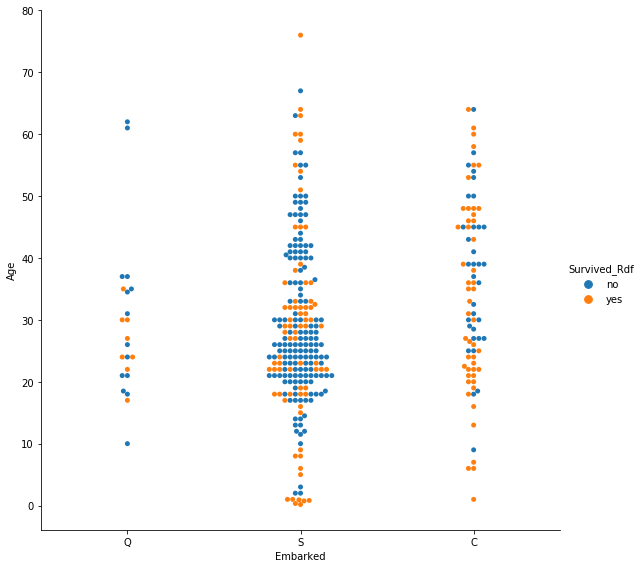

In [361]:
sns.catplot(x="Embarked", y="Age", hue="Survived_lgr", kind="swarm", data=df_test,height=8, aspect=1)
sns.catplot(x="Embarked", y="Age", hue="Survived_Rdf", kind="swarm", data=df_test,height=8, aspect=1)

##### Age and Sex

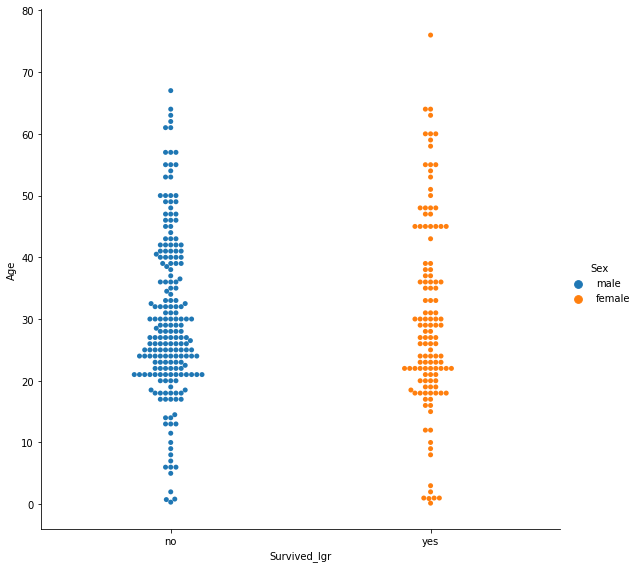

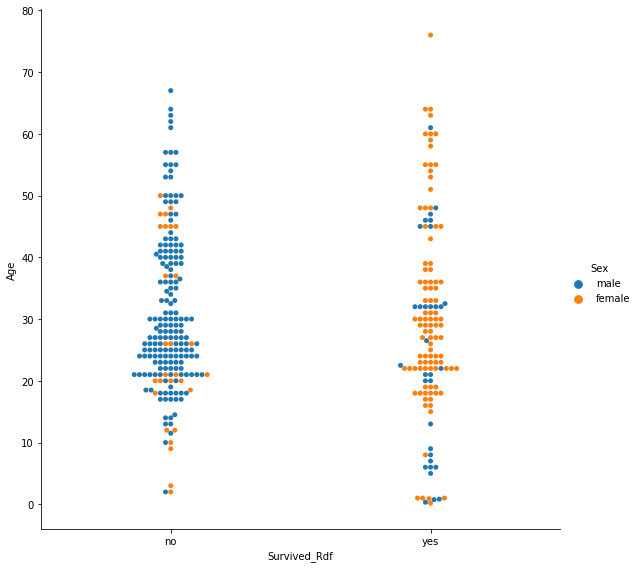

In [362]:
sns.catplot(x="Survived_lgr", y="Age", hue="Sex", kind="swarm", data=df_test,height=8, aspect=1)
sns.catplot(x="Survived_Rdf", y="Age", hue="Sex", kind="swarm", data=df_test,height=8, aspect=1)

## 6. Conclusion

In this project we did soma data cleaning, data modeling, data analysis in order to understand what sorts of people  
were likely to survive.  
We found that the women are most likely to survive than men, also the people who have the least chance  
of getting out are those who are 20 to 40 years old.  
This can be explained by the fact that the evacuation team favored women and children as well as the old person.  
Aslo, we notice that there is a relationship between the boarding and the number of related person for each passengers.  
Finally we create two machine learning model in order to do some prediction :  
- Logistic Regression   
- Random Forest  
  
The main difference between the forecasts of these two models is that the Random forest model has taken into account the   embarking of the passagers while the logit model relies mainly on sex as a factor of survival, its advantage is that it allows us to visualize the results in the form of probability.